In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
%cd  'Image classtifire'

[Errno 2] No such file or directory: 'Image classtifire'
/content/gdrive/My Drive


In [ ]:
%cd '/content/gdrive/My Drive/Image classtifire/elephant detection'

/content/gdrive/My Drive/Image classtifire/elephant detection


In [ ]:
!git clone https://github.com/tensorflow/models.git
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools ../../models/research/

In [ ]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython

In [ ]:
%cd /content/gdrive/My Drive/Image classtifire/elephant detection/models/research/
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/Image classtifire/elephant detection/models/research


In [ ]:
import os
os.environ['PYTHONPATH'] += ':/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/:/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/slim:/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection'
print(os.environ['PYTHONPATH'])

/env/python:/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/:/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/slim:/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection


In [ ]:
os.environ['PYTHONPATH'] += '~/Downloads/models/models/research/~/Downloads/models/models/research/slim'

In [ ]:
%cd /content/gdrive/My Drive/Image classtifire/elephant detection/models/research/

/content/gdrive/My Drive/Image classtifire/elephant detection/models/research


In [ ]:
!python setup.py build
!python setup.py install

running build
running build_py
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/object_detection
copying build/lib/object_detection/CONTRIBUTING.md -> build/bdist.linux-x86_64/egg/object_detec

**เวลา**

In [ ]:
import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Time remaining for this session is: ', Left/3600)

Time remaining for this session is:  11.791217580636342


In [ ]:
pwd

'/content/gdrive/My Drive/Image classtifire/elephant detection'

In [ ]:
#rember the last CD you did in order to specify the directory.
!python object_detection/builders/model_builder_test.py

generate_tfrecord

In [ ]:
%cd 'research/object_detection/'

/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection


In [ ]:
pwd

'/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection'

In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df
def main(directory_list):
    for Image_cat in directory_list:
        image_path = os.path.join(os.getcwd(), 'Images2/{}'.format(Image_cat))
        xml_df = xml_to_csv(image_path) 
        xml_df.to_csv('Images2/{}_labels.csv'.format(Image_cat), index=None)
        print('Successfully converted xml to csv.')
main(['train','test'])

Successfully converted xml to csv.
Successfully converted xml to csv.


In [ ]:
!python xml_to_csv.py

python3: can't open file 'xml_to_csv.py': [Errno 2] No such file or directory


In [ ]:
# for test data
!python generate_tfrecord.py --csv_input=Images2/test_labels.csv  --output_path=test.record  --image_dir=Images2/test



W0130 15:03:15.905783 139695061190528 module_wrapper.py:139] From generate_tfrecord.py:86: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0130 15:03:15.918834 139695061190528 module_wrapper.py:139] From generate_tfrecord.py:45: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection/test.record


In [ ]:
# for train data
!python generate_tfrecord.py --csv_input=Images2/train_labels.csv  --output_path=train.record  --image_dir=Images2/train



W0130 15:04:10.549170 140118879324032 module_wrapper.py:139] From generate_tfrecord.py:86: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0130 15:04:10.561968 140118879324032 module_wrapper.py:139] From generate_tfrecord.py:45: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection/train.record


In [ ]:
!curl http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_11_06_2017.tar.gz --output ssd_mobilenet_v1_coco_11_06_2017.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  122M  100  122M    0     0  43.5M      0  0:00:02  0:00:02 --:--:-- 43.5M


In [ ]:
!tar -xvf ssd_mobilenet_v1_coco_11_06_2017.tar.gz

ssd_mobilenet_v1_coco_11_06_2017/
ssd_mobilenet_v1_coco_11_06_2017/model.ckpt.index
ssd_mobilenet_v1_coco_11_06_2017/model.ckpt.meta
ssd_mobilenet_v1_coco_11_06_2017/frozen_inference_graph.pb
ssd_mobilenet_v1_coco_11_06_2017/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_11_06_2017/graph.pbtxt


In [ ]:
pwd

'/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection'

In [ ]:
!curl https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/samples/configs/ssd_mobilenet_v1_coco.config --output ssd_mobilenet_v1_coco.config

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4713  100  4713    0     0   148k      0 --:--:-- --:--:-- --:--:--  148k


In [ ]:
LOG_DIR = 'training'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
# Install
! npm install -g localtunnel
! npm i -g npm
# Tunnel port 6006 (TensorBoard assumed running)
get_ipython().system_raw('lt --port 6006 >> url1.txt 2>&1 &')
# Get url
! cat url1.txt

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.0
updated 1 package in 1.423s
/tools/node/bin/npm -> /tools/node/lib/node_modules/npm/bin/npm-cli.js
/tools/node/bin/npx -> /tools/node/lib/node_modules/npm/bin/npx-cli.js
+ npm@6.13.6
updated 1 package in 6.032s


In [ ]:
%cd '/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection'

/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection


In [ ]:
import sys
print(sys.path)
sys.path.append("/usr/local/lib/python2.7/dist-packages/tensorflow/contrib/slim")
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']
['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/usr/local/lib/python2.7/dist-packages/tensorflow/contrib/slim']


In [ ]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=../ssd_mobilenet_v1_coco.config

In [ ]:
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path ../ssd_mobilenet_v1_coco.config --trained_checkpoint_prefix training/model.ckpt-2631 --output_directory My_exp_graph/

In [ ]:
!zip -r MY_exp_g.zip My_exp_graph

In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection')
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '..', '/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection']


In [ ]:
%cd 'object_detection'

/content/gdrive/My Drive/Image classtifire/elephant detection/models/research/object_detection


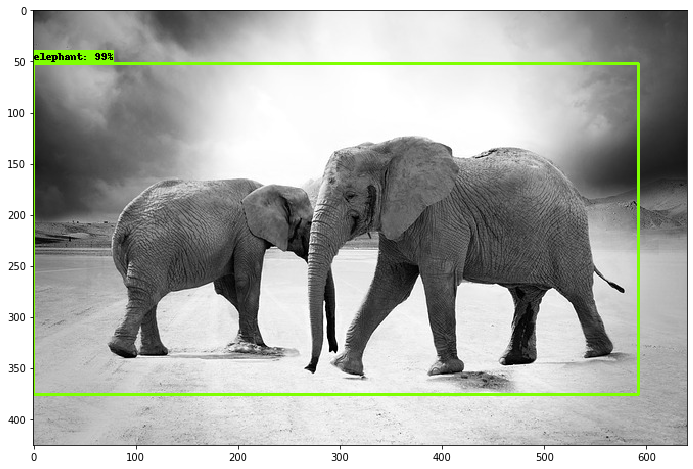

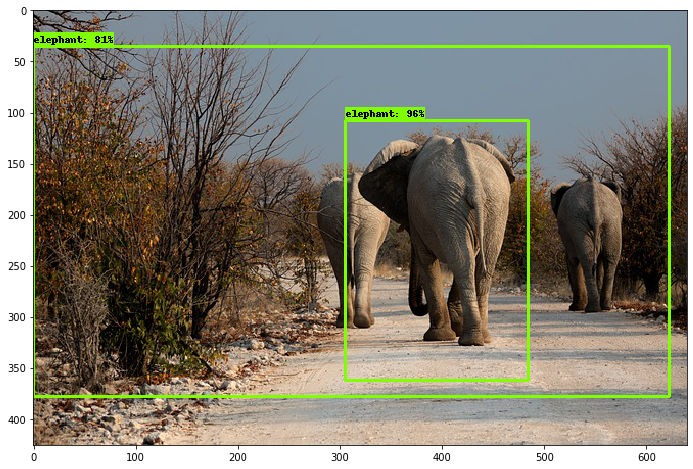

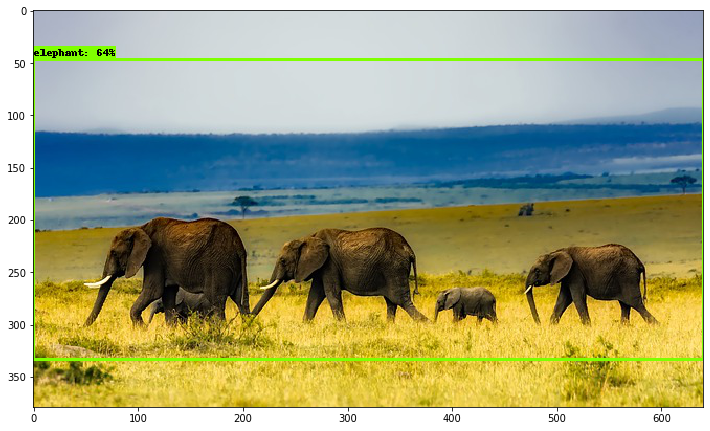

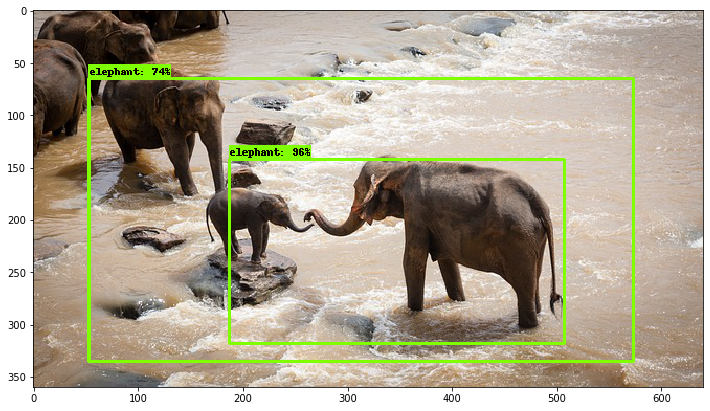

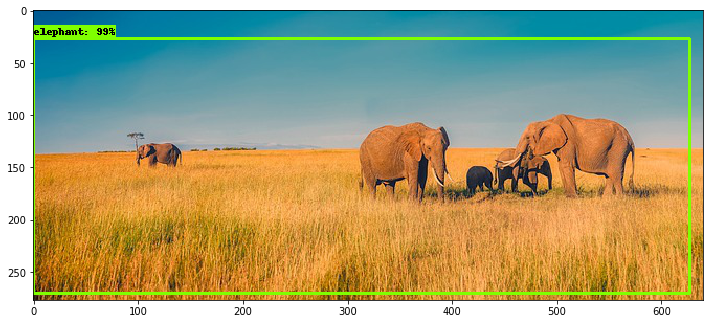

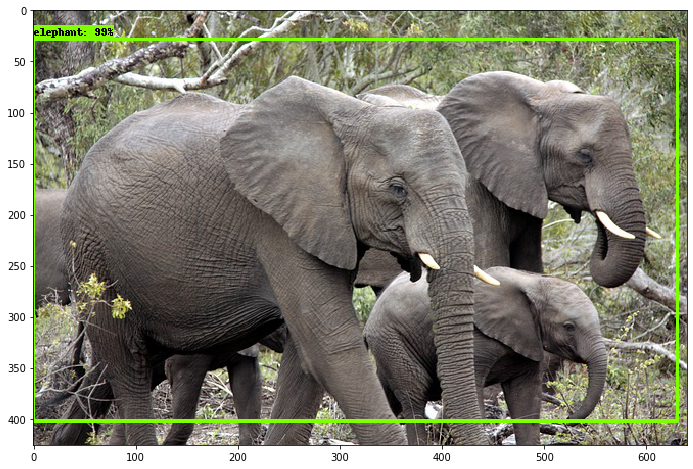

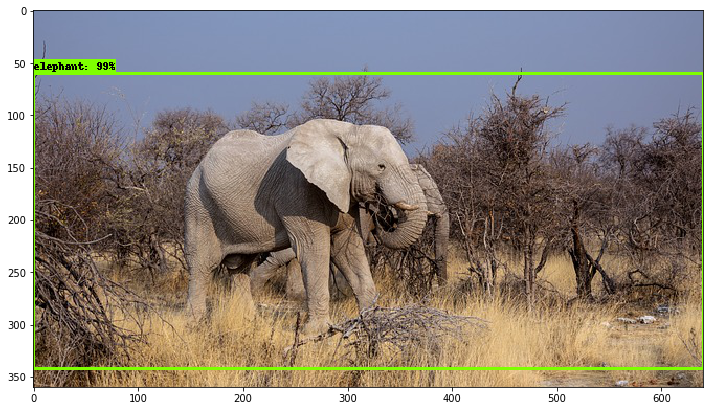

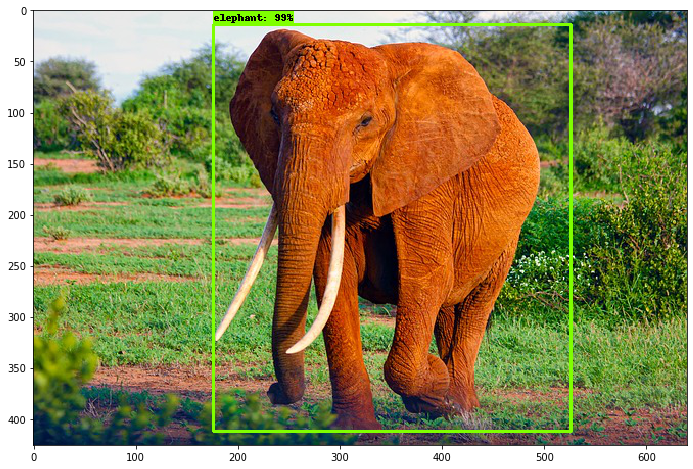

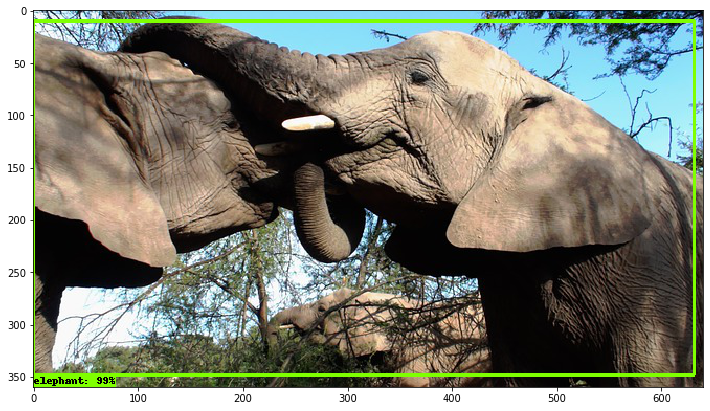

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops
%matplotlib inline
from utils import label_map_util
from utils import visualization_utils as vis_util

MODEL_NAME = 'My_exp_graph'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = 'training/object-detection.pbtxt'
NUM_CLASSES = 1

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
# Loading label map
#category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

#Helper code
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

# Detection -------------------------------------------------------
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images/'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 10) ]
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in ['num_detections', 'detection_boxes', 'detection_scores','detection_classes', 'detection_masks']:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(tensor_name)
      if 'detection_masks' in tensor_dict:
      # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
      # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')
      # Run inference
      output_dict = sess.run(tensor_dict, feed_dict={image_tensor: image})
      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks'),
    use_normalized_coordinates=True,
    line_thickness=3)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.0
